# Presentación de avance - Martes 16 de Marzo

In [2]:
# Imports
import matplotlib.pyplot as plt
from testing_functions import test_hss
from process_functions import preprocessing_audio
from utils import find_and_open_audio, signal_segmentation
from heart_sound_segmentation.filter_and_sampling import downsampling_signal
from IPython.display import Audio

# Segmentación de sonidos cardiorrespiratorios

In [3]:
# Parámetros de las funciones
lowpass_params = {'freq_pass': 140, 'freq_stop': 150}       # None
model_name = 'definitive_segnet_based'

# Parámetros base de datos
symptom = 'Healthy'
priority = 1
ausc_pos = 'toracic'
nmf_method = 'to_all'

# Definición de la frecuencia de muestreo deseada para 
# separación de fuentes
samplerate_des = 11025  # Hz

# Cargando el archivo de audio 
audio, samplerate = find_and_open_audio(symptom='Healthy', 
                                        ausc_pos='toracic', 
                                        priority=1)

Seleccione el archivo que desea descomponer:
[1] 040_Patient010_Dis0.wav
[2] 123_1b1_Al_sc_Meditron.wav
[3] 126_1b1_Al_sc_Meditron.wav
[4] 136_1b1_Ar_sc_Meditron.wav
[5] 144_1b1_Al_sc_Meditron.wav
[6] 159_1b1_Al_sc_Meditron.wav
[7] 179_1b1_Al_sc_Meditron.wav
[8] 184_1b1_Ar_sc_Meditron.wav
[9] 214_1b1_Ar_sc_Meditron.wav
[10] 224_1b2_Al_sc_Meditron.wav
Selección: 10


In [3]:
# Realizando un downsampling para obtener la tasa de muestreo
# fs = 11025 Hz utilizada en la separación de fuentes
_, audio_dwns = downsampling_signal(audio, samplerate, 
                                    samplerate_des//2-100, 
                                    samplerate_des//2)

# Obteniendo la salida de la red
_, y_hat_to, (y_out2, _, _) = \
        signal_segmentation(audio, samplerate, model_name,
                            length_desired=len(audio_dwns),
                            lowpass_params=lowpass_params,
                            plot_outputs=False)

Downsampling de la señal de fs = 44100 Hz a fs = 1000 Hz.
Señal acondicionada a 1000 Hz.
1/1 [==============================] - ETA:  - 0s 4ms/step


<IPython.core.display.Javascript object>


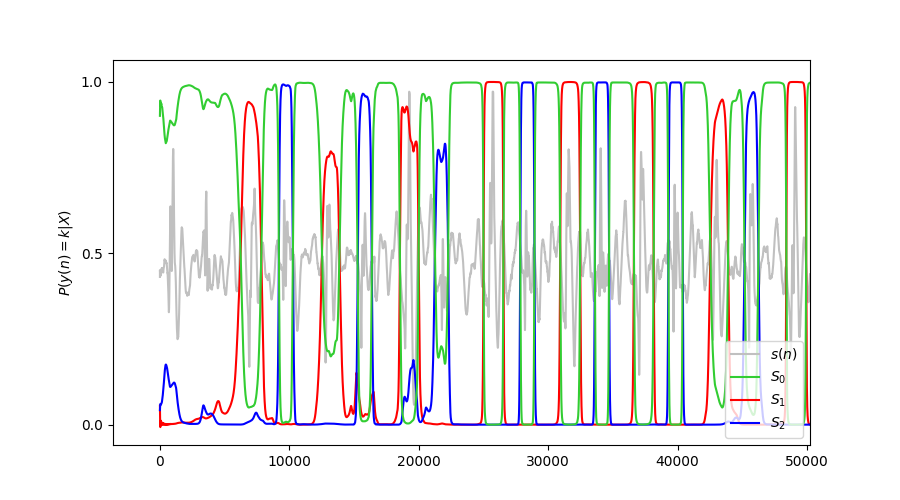

In [4]:
%matplotlib notebook
plt.figure(figsize=(9,5))
audio_data_plot = 0.5 * audio_dwns / max(abs(audio_dwns))
plt.plot(audio_data_plot - min(audio_data_plot), label=r'$s(n)$', 
         color='silver', zorder=0)
plt.plot(y_hat_to[0,:,0], label=r'$S_0$', color='limegreen', zorder=2)
plt.plot(y_hat_to[0,:,1], label=r'$S_1$', color='red', zorder=1)
plt.plot(y_hat_to[0,:,2], label=r'$S_2$', color='blue', zorder=1)
plt.legend(loc='lower right')
plt.yticks([0, 0.5, 1])
plt.ylabel(r'$P(y(n) = k | X)$')
plt.show()

# Separación de sonidos cardio respiratorios

Seleccione el archivo que desea descomponer:
[1] 040_Patient010_Dis0.wav
[2] 123_1b1_Al_sc_Meditron.wav
[3] 126_1b1_Al_sc_Meditron.wav
[4] 136_1b1_Ar_sc_Meditron.wav
[5] 144_1b1_Al_sc_Meditron.wav
[6] 159_1b1_Al_sc_Meditron.wav
[7] 179_1b1_Al_sc_Meditron.wav
[8] 184_1b1_Ar_sc_Meditron.wav
[9] 214_1b1_Ar_sc_Meditron.wav
[10] 224_1b2_Al_sc_Meditron.wav
Selección: 3
Downsampling de la señal de fs = 44100 Hz a fs = 1000 Hz.
Señal acondicionada a 1000 Hz.
1/1 [==============================] - ETA:  - 0s 3ms/step
Aplicando separación de fuentes to_all...
Separación de fuentes completada


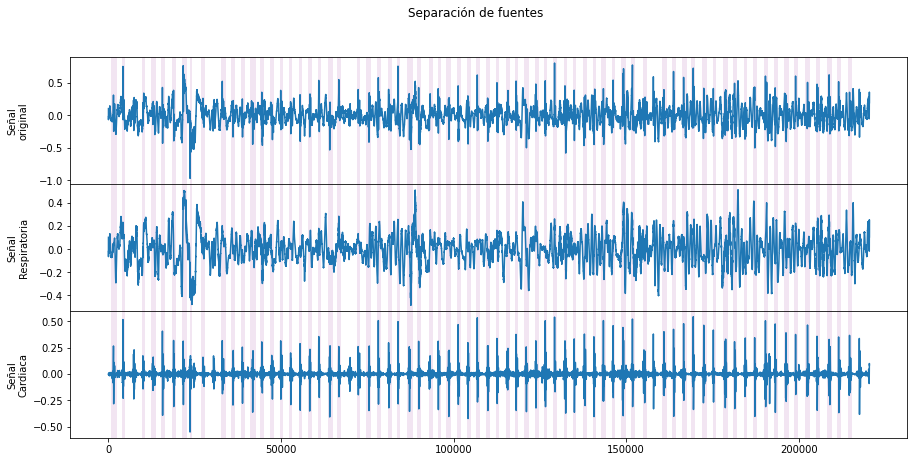

In [10]:
# Definición de los parámetros de filtros pasa bajos de la salida de la red
lowpass_params = {'freq_pass': 140, 'freq_stop': 150}

# Definición de los parámetros NMF
nmf_parameters = {'n_components': 5, 'N': 1024, 'N_lax': 100, 
                  'N_fade': 100, 'noverlap': 768, 'repeat': 0, 
                  'padding': 0, 'window': 'hamming', 'init': 'random',
                  'solver': 'mu', 'beta': 1, 'tol': 1e-4, 
                  'max_iter': 200, 'alpha_nmf': 0, 'l1_ratio': 0, 
                  'random_state': 0, 'dec_criteria': 'vote'}

# Parámetros base de datos
symptom = 'Healthy'
priority = 1
ausc_pos = 'toracic'
nmf_method = 'to_all'

resp_signal, heart_signal = \
        preprocessing_audio(model_name, lowpass_params, symptom,
                            nmf_parameters, ausc_pos=ausc_pos, 
                            priority=1, nmf_method=nmf_method,
                            plot_segmentation=False,
                            plot_separation=True)

In [36]:
# Ejemplo de la señal cardio respiratoria original
audio, samplerate = find_and_open_audio(symptom='Healthy', 
                                        ausc_pos='toracic', 
                                        priority=1)

_, audio_dwns = downsampling_signal(audio, samplerate, 
                                    samplerate_des//2-100, 
                                    samplerate_des//2)

Audio(audio_dwns, rate=samplerate_des)

Seleccione el archivo que desea descomponer:
[1] 040_Patient010_Dis0.wav
[2] 123_1b1_Al_sc_Meditron.wav
[3] 126_1b1_Al_sc_Meditron.wav
[4] 136_1b1_Ar_sc_Meditron.wav
[5] 144_1b1_Al_sc_Meditron.wav
[6] 159_1b1_Al_sc_Meditron.wav
[7] 179_1b1_Al_sc_Meditron.wav
[8] 184_1b1_Ar_sc_Meditron.wav
[9] 214_1b1_Ar_sc_Meditron.wav
[10] 224_1b2_Al_sc_Meditron.wav
Selección: 4


In [34]:
Audio(resp_signal, rate=samplerate_des)

In [35]:
Audio(heart_signal, rate=samplerate_des)

In [11]:
print(10 * np.log10(sum(resp_signal ** 2) / sum(heart_signal ** 2)))

6.4465788739873595
